<a href="https://colab.research.google.com/github/afdhald/ML-Genap-2425/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Step 1**

*   Import library yang diperlukan seperti pandas, numpy, sklearn, dan lainnya
*   Download dataset from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
*   Upload dataset yang sudah di download ke repository github

In [ ]:
import pandas as pd

# load dataset
dataset_url = 'https://raw.githubusercontent.com/afdhald/ML-Genap-2425/refs/heads/main/Dataset/diabetes.csv'
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Selecting features**

We need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

## **Splitting data**
*   Split the dataset by using the function **train_test_split()**.
*   We need to pass 3 parameters: **features**, **target**, and **test_set** size.
*   Bagi dataset menjadi data training (70%) dan data testing (30%)

In [ ]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

#**Model development and prediction**
* Import the LogisticRegression module
* Create a logistic regression classifier object using the LogisticRegression() function
* Fit your model on the train set using fit() and perform prediction on the test set using predict().

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **Model Evaluation using Confusion Matrix**

Confusion Matrix adalah sebuah tabel yang digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan prediksi model dengan nilai sebenarnya dari data uji.
Confusion matrix terdiri dari 4 komponen utama:


1.   True Positive (TP)
    *   Model memprediksi positif dan hasil aslinya memang positif.
    *   Contoh: Model mendeteksi email sebagai spam, dan memang email itu adalah spam.
2.   False Positive (FP)
    * Model memprediksi positif, tetapi hasil aslinya sebenarnya negatif.
    *    Contoh: Model mengira email adalah spam, tetapi sebenarnya bukan spam.
3. False Negative (FN)
    * Model memprediksi negatif, tetapi hasil aslinya sebenarnya positif.
    * Contoh: Model mengira email bukan spam, tetapi sebenarnya spam.
4. True Negative
    * Model memprediksi negatif, dan hasil aslinya memang negatif.
    * Contoh: Model mengira email bukan spam, dan memang benar email itu bukan spam.


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 24,  43]])

Text(0.5, 427.9555555555555, 'Predicted label')

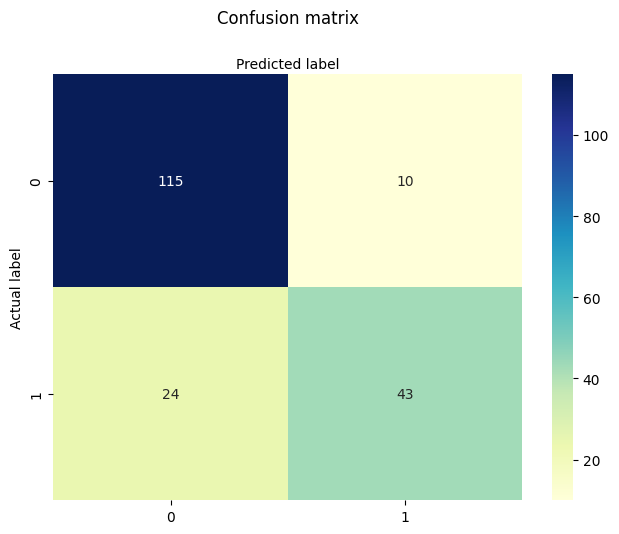

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Confusion matrix evaluation metrics**

Dari confusion matrix, kita bisa menghitung berbagai metrik evaluasi untuk memahami performa model:


1.   Akurasi (Accuracy) – Seberapa sering model membuat prediksi yang benar:
    * Mengukur proporsi prediksi yang benar dari keseluruhan data.
    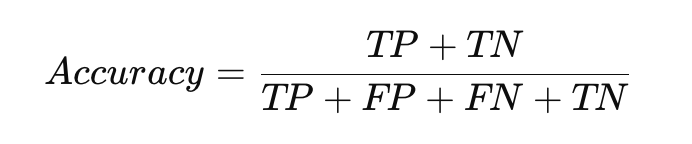
2.   Presisi (Precision) – Seberapa banyak prediksi positif yang benar:
    * Berguna jika kita ingin menghindari terlalu banyak false positive.
    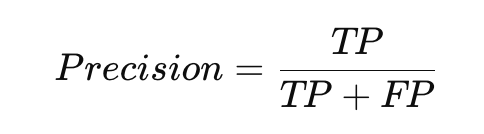
3.   Recall (Sensitivity atau True Positive Rate) – Seberapa baik model menangkap semua kasus positif:
    * Penting dalam kasus di mana kita ingin meminimalkan false negative, misalnya dalam diagnosis penyakit.
    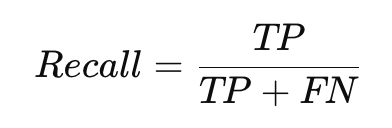
4.   F1-Score – Rata-rata harmonis antara presisi dan recall:
    * Berguna jika kita ingin keseimbangan antara presisi dan recall.
    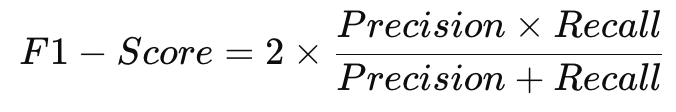
5.   Specificity (True Negative Rate) – Seberapa baik model mengenali kelas negatif:
    * Berguna dalam kasus di mana false positive perlu dihindari, seperti deteksi penipuan kartu kredit.
    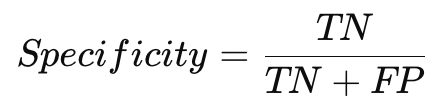



In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.83      0.92      0.87       125
   with diabetes       0.81      0.64      0.72        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192



##**ROC curve**
**Receiver Operating Characteristic** (ROC) Curve adalah grafik yang digunakan untuk mengevaluasi kinerja model klasifikasi, terutama dalam binary classification (klasifikasi dua kelas). ROC curve menunjukkan keseimbangan antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai ambang batas (threshold).

ROC curve sangat berguna ketika kita ingin memahami seberapa baik model bisa membedakan antara kelas positif dan negatif, terutama ketika dataset memiliki distribusi kelas yang tidak seimbang.

**ROC Curve yang bagus** mendekati pojok kiri atas, menandakan model memiliki banyak True Positives dan sedikit False Positives.

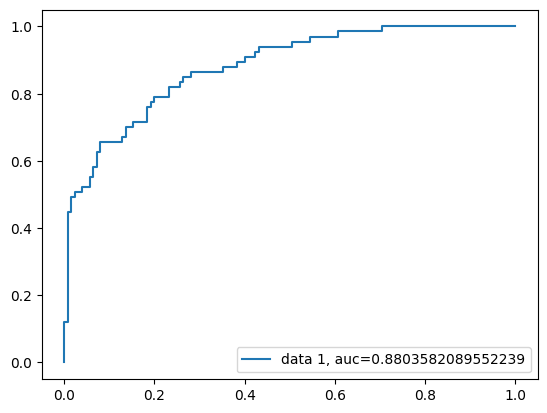

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##**Area Under Curve (AUC)**

*   Untuk mempermudah interpretasi ROC curve, kita bisa menghitung Area Under the Curve (AUC), yaitu luas di bawah ROC curve.

*   AUC mengukur seberapa baik model membedakan kelas positif dan negatif (semakin tinggi, semakin baik).

*   AUC score for the case is 0.88.
*   AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier

